In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error


In [76]:
data=pd.read_csv('house_price.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


handling missing value

In [77]:
def null():
    for i in data.columns:
        if data[i].isna().sum()>0:
            print (i,data[i].isna().sum())


In [78]:
data=data.drop({'MiscFeature','Fence','PoolQC','Alley','Id','FireplaceQu'},axis=1)

In [79]:
null()

LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [80]:

data=data.dropna()

In [81]:
null()

In [82]:
data['MasVnrType']

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1094, dtype: object

In [83]:
null()

In [84]:
data=data.drop_duplicates()

remove outliers

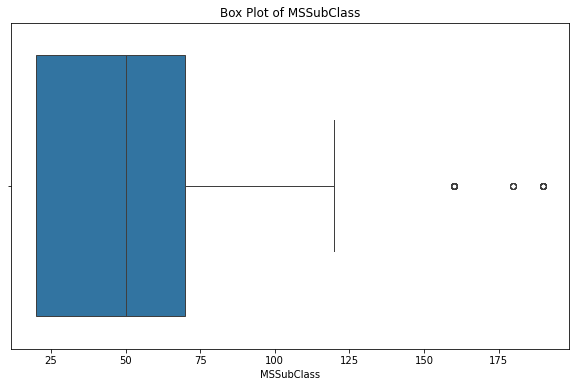

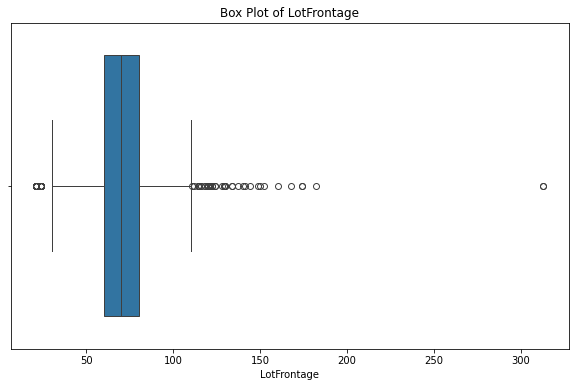

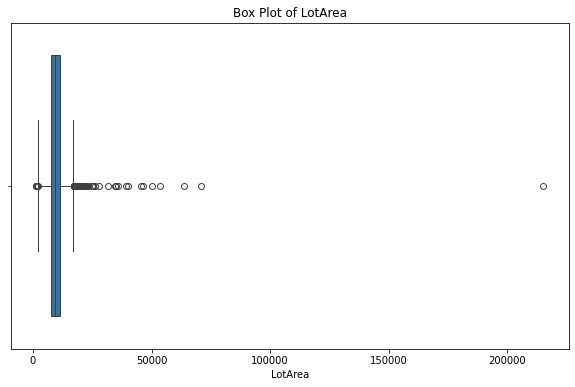

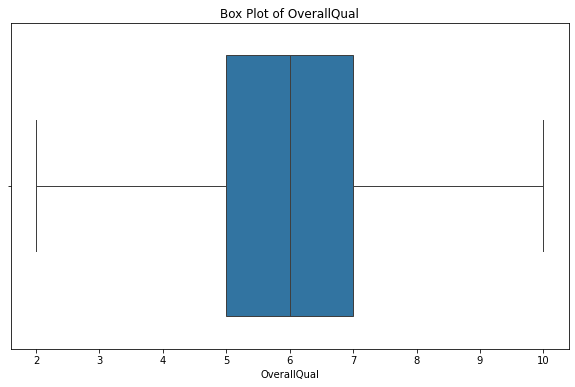

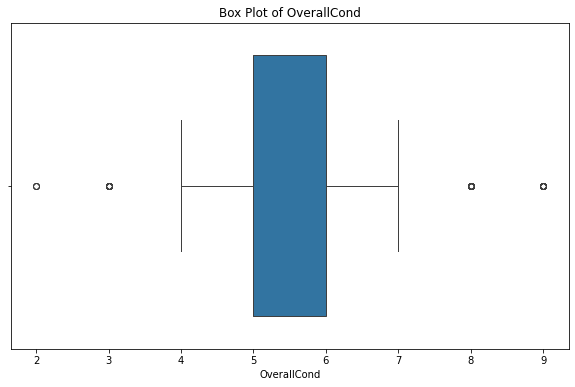

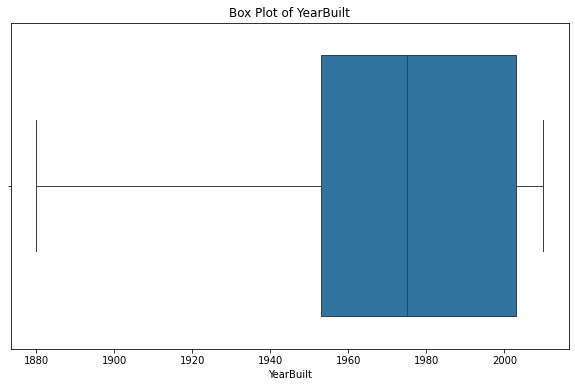

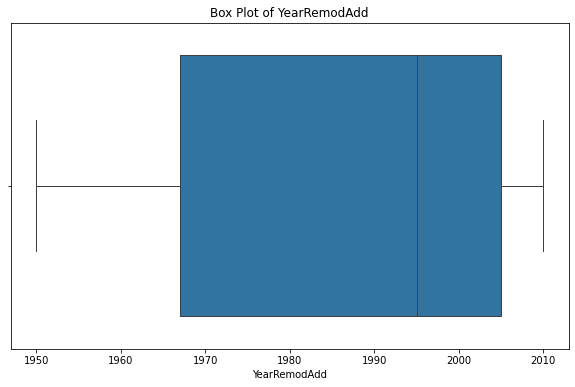

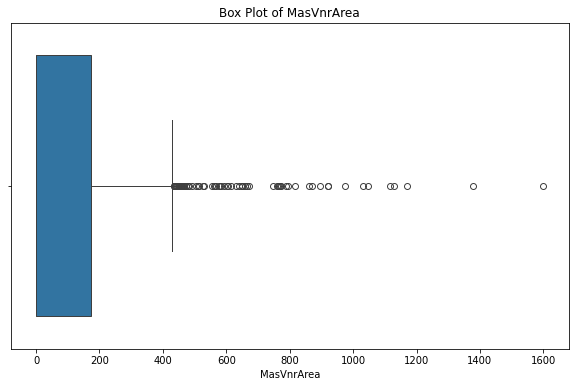

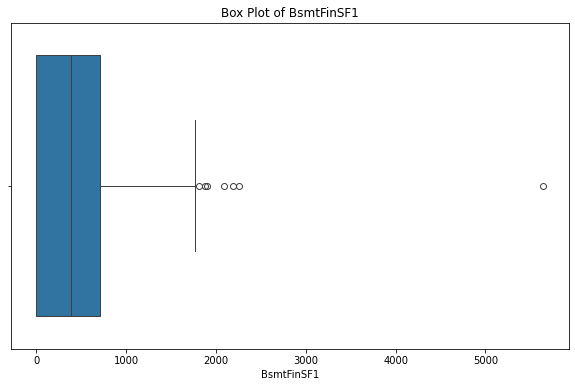

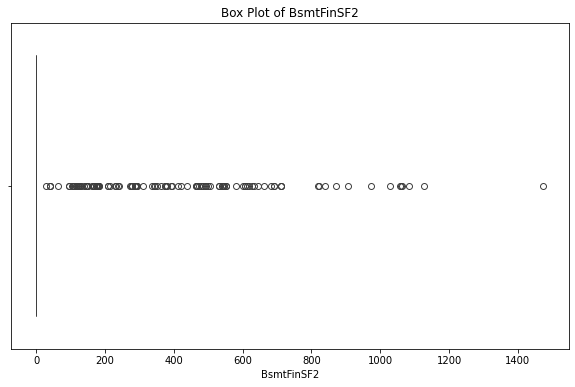

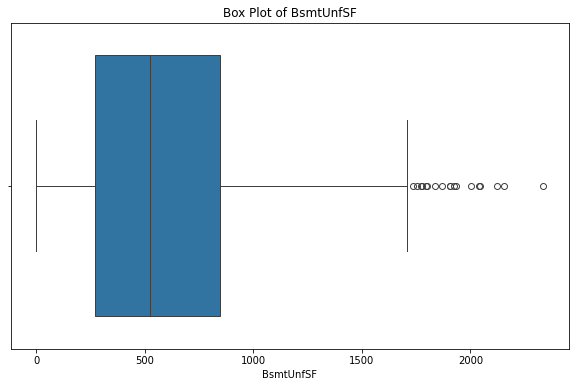

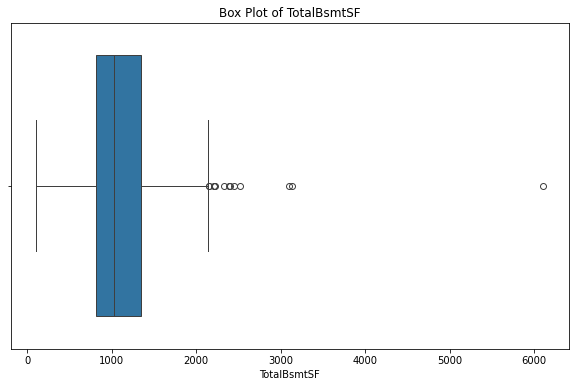

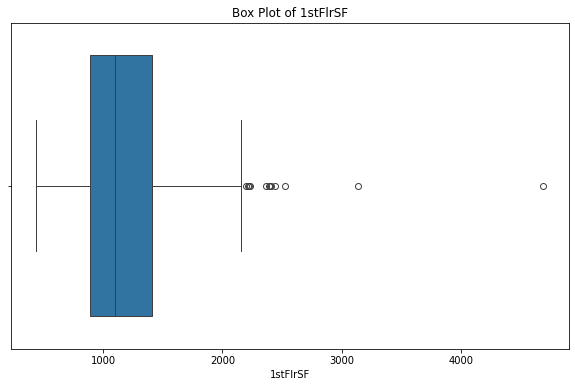

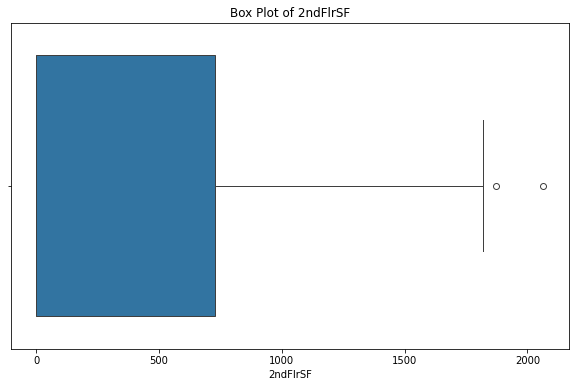

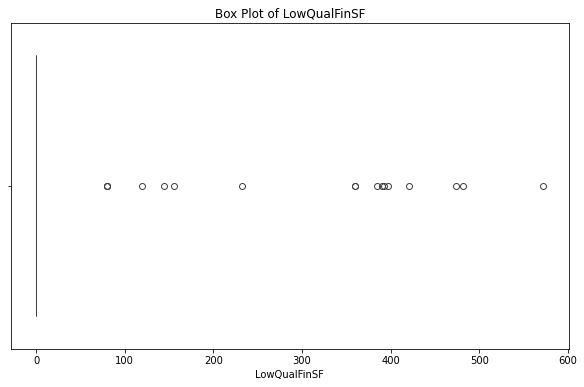

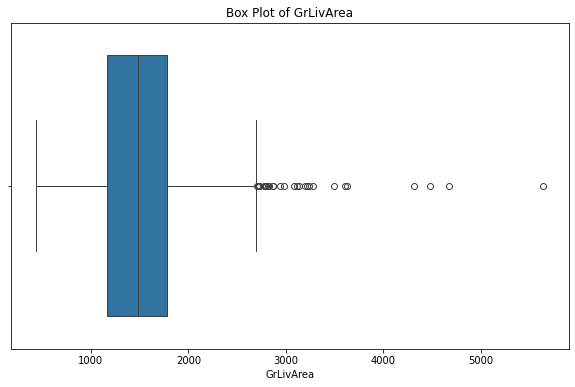

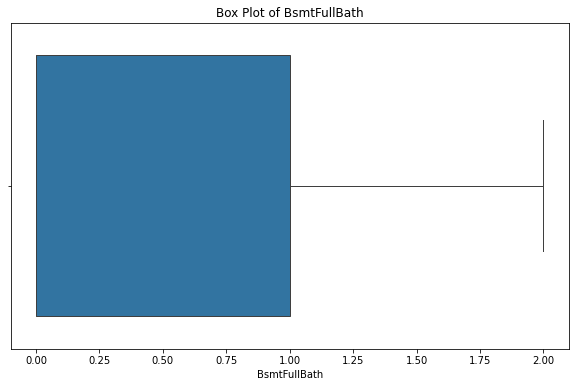

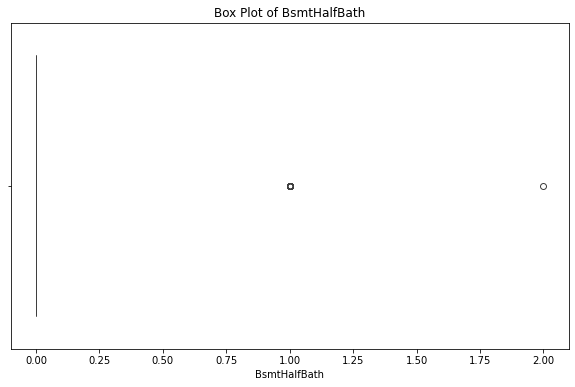

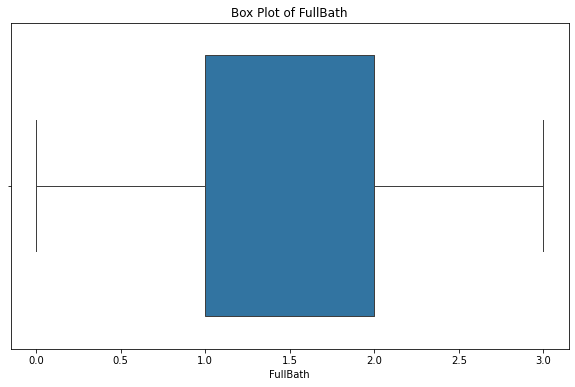

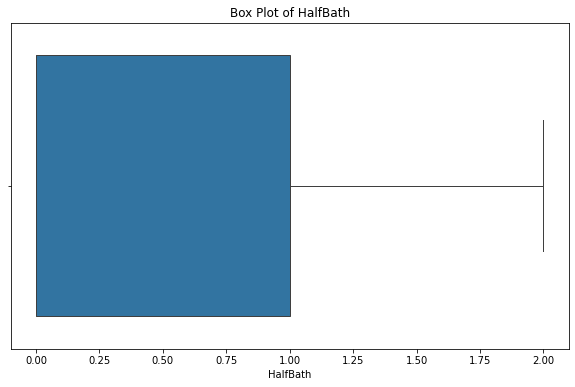

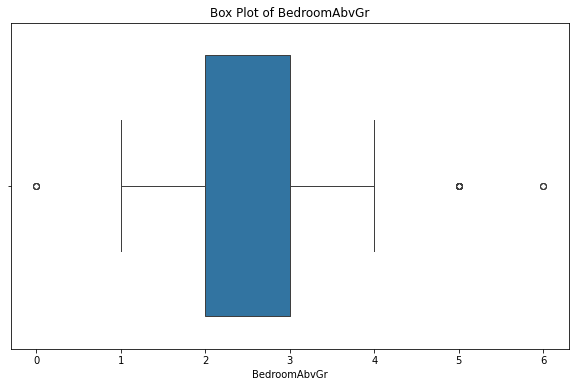

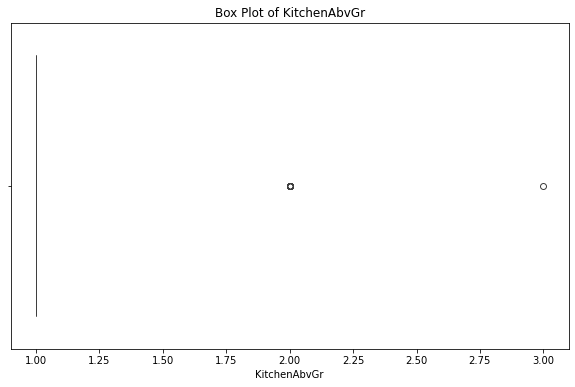

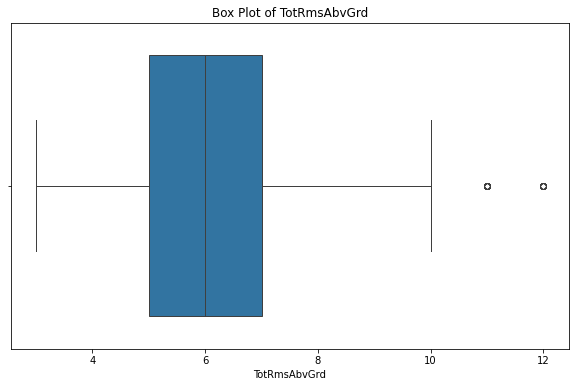

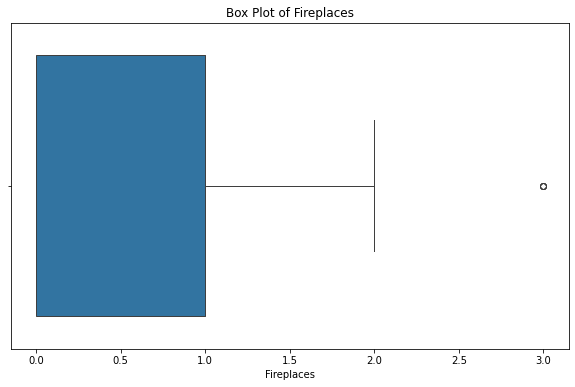

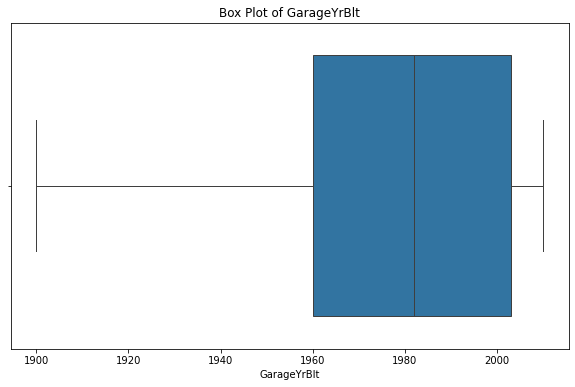

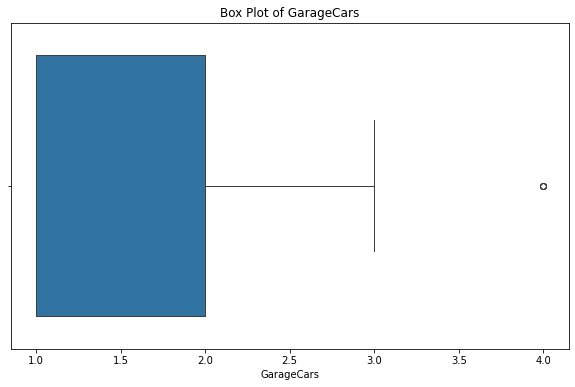

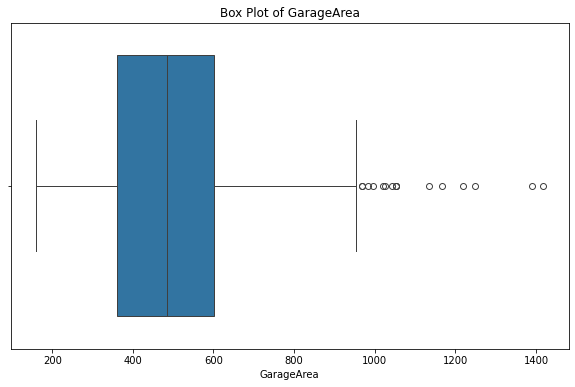

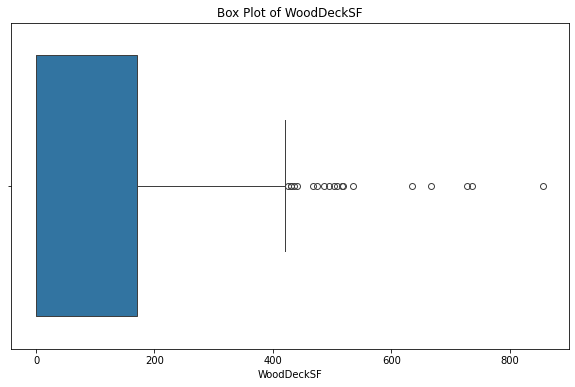

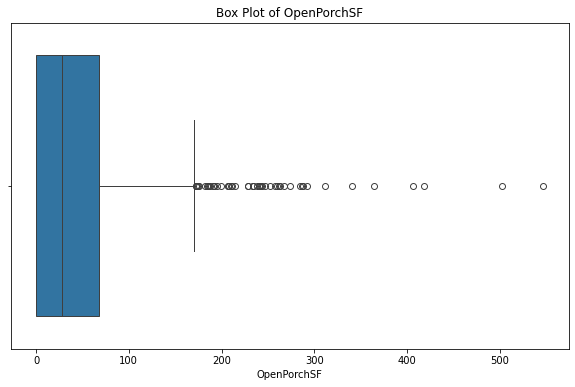

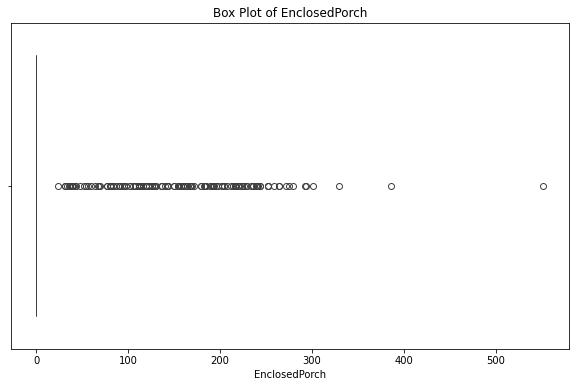

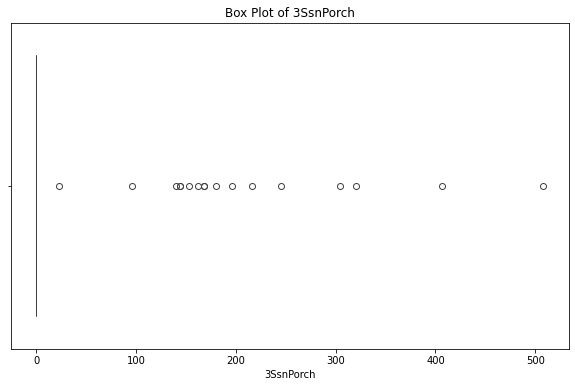

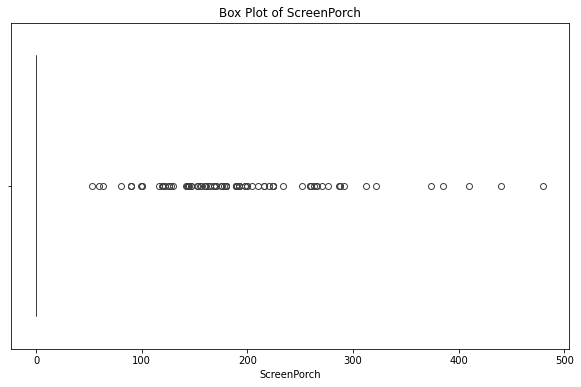

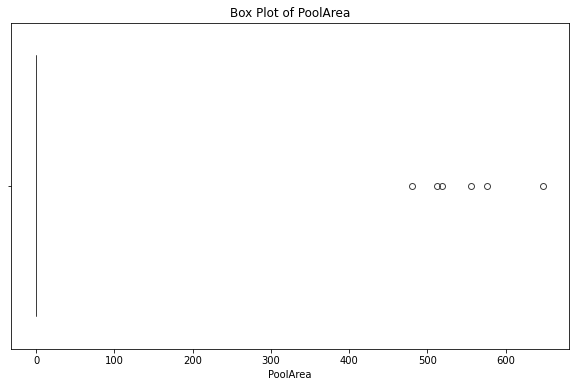

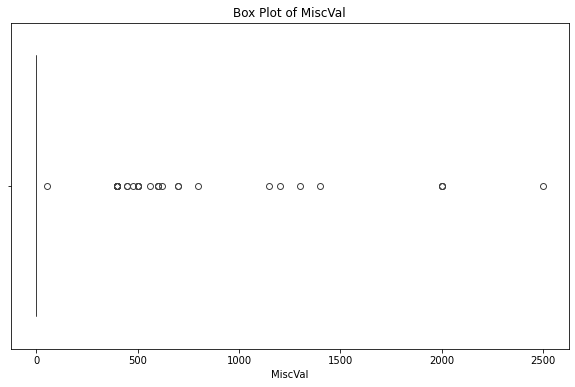

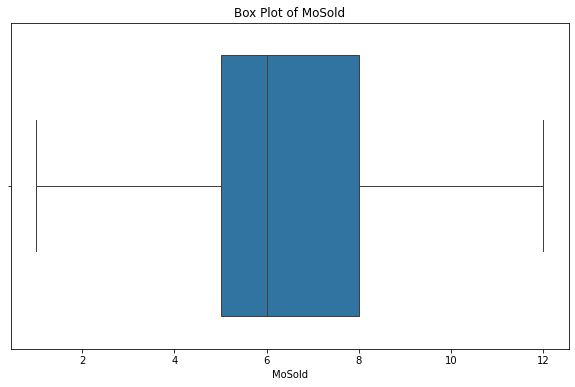

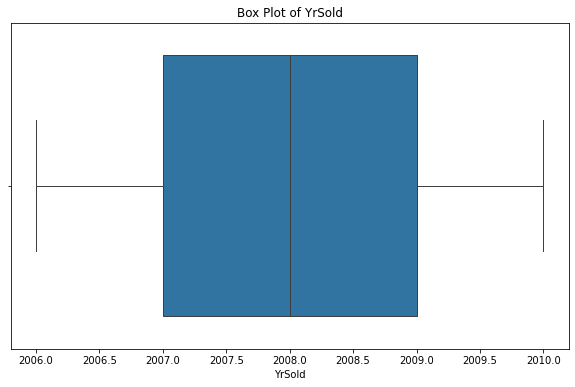

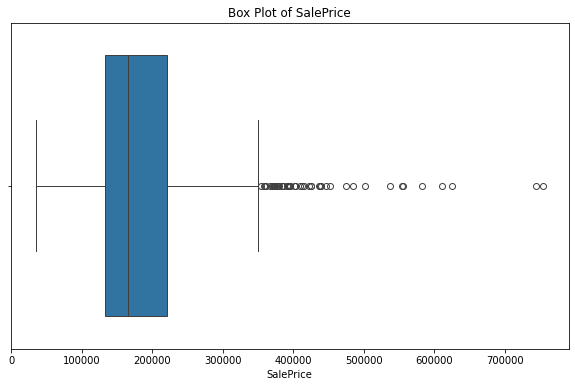

In [85]:

# Draw box plots for each numeric column in the DataFrame
def plot_boxplots(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
        plt.xlabel(col)
        plt.show()

# Assuming 'data' is your DataFrame
plot_boxplots(data)


most of outliers are with very high values 

remove outliers


In [86]:

def detect_and_replace_outliers_percentile(df, lower_percentile=5, upper_percentile=95):
    for col in df.columns:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df[col]):
            lower_bound = np.percentile(df[col], lower_percentile)
            upper_bound = np.percentile(df[col], upper_percentile)
            
            df.loc[df[col] < lower_bound, col] = lower_bound
            df.loc[df[col] > upper_bound, col] = upper_bound
        
    return df

# Assuming 'data' is your DataFrame
data = detect_and_replace_outliers_percentile(data)


normalization


In [87]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

for column in data.columns[:-1]:
    if data[column].dtype != 'O':
        data[column] = scaler.fit_transform(data[[column]])
data


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.285714,RL,0.418919,0.400365,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.50,WD,Normal,208500.0
1,0.000000,RL,0.621622,0.488568,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0.0,0.0,0.0,0.0,0.333333,0.25,WD,Normal,181500.0
2,0.285714,RL,0.459459,0.615120,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0.0,0.0,0.0,0.0,0.777778,0.50,WD,Normal,223500.0
3,0.357143,RL,0.351351,0.484733,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,1.000000,0.0,0.0,0.0,0.0,0.000000,0.00,WD,Abnorml,140000.0
4,0.285714,RL,0.675676,0.845982,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.285714,RL,0.378378,0.359485,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0.0,0.0,0.0,0.0,0.666667,0.25,WD,Normal,175000.0
1456,0.000000,RL,0.689189,0.762765,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0.0,0.0,0.0,0.0,0.000000,1.00,WD,Normal,210000.0
1457,0.357143,RL,0.432432,0.445770,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0.0,0.0,0.0,0.0,0.333333,1.00,WD,Normal,266500.0
1458,0.000000,RL,0.459459,0.497542,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.608696,0.0,0.0,0.0,0.0,0.222222,1.00,WD,Normal,142125.0


with fit normalization in the price ,lasso regression got 0 score and doesnot fit well 

target encoder

In [88]:
def target_encode(df, target_column, smoothing=1):
    # Create a copy of the DataFrame to avoid modifying the original data
    df_encoded = df.copy()

    # Compute the global mean of the target variable
    global_mean = df[target_column].mean()
    
    # Iterate through each column in the DataFrame
    for col in df.columns:
        if df[col].dtype == 'object':  # Check if the column is categorical
            # Compute the mean and count for each category in the column
            mean = df.groupby(col)[target_column].mean()
            count = df.groupby(col)[target_column].count()
            
            # Apply smoothing to the mean encoding
            smooth_mean = (count * mean + smoothing * global_mean) / (count + smoothing)
            
            # Map the smoothed means back to the original column
            df_encoded[col] = df[col].map(smooth_mean)
            
    return df_encoded

# Apply target encoding to all categorical features in the DataFrame
# data = target_encode(data, target_column='SalePrice')
enc=LabelEncoder()
for i in data.columns:
    if data[i].dtype=='O':
        data[i]=enc.fit_transform(data[i])

In [89]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.285714,3,0.418919,0.400365,1,3,3,0,4,0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.50,8,4,208500.0
1,0.000000,3,0.621622,0.488568,1,3,3,0,2,0,...,0.000000,0.0,0.0,0.0,0.0,0.333333,0.25,8,4,181500.0
2,0.285714,3,0.459459,0.615120,1,0,3,0,4,0,...,0.000000,0.0,0.0,0.0,0.0,0.777778,0.50,8,4,223500.0
3,0.357143,3,0.351351,0.484733,1,0,3,0,0,0,...,1.000000,0.0,0.0,0.0,0.0,0.000000,0.00,8,0,140000.0
4,0.285714,3,0.675676,0.845982,1,0,3,0,2,0,...,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.285714,3,0.378378,0.359485,1,3,3,0,4,0,...,0.000000,0.0,0.0,0.0,0.0,0.666667,0.25,8,4,175000.0
1456,0.000000,3,0.689189,0.762765,1,3,3,0,4,0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,1.00,8,4,210000.0
1457,0.357143,3,0.432432,0.445770,1,3,3,0,4,0,...,0.000000,0.0,0.0,0.0,0.0,0.333333,1.00,8,4,266500.0
1458,0.000000,3,0.459459,0.497542,1,3,3,0,4,0,...,0.608696,0.0,0.0,0.0,0.0,0.222222,1.00,8,4,142125.0


In [90]:
c=[]
for i in data.columns:
    if data[i].dtype=='O':
        c.append(i)
data=data.drop(c,axis=1)

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'MSZoning'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'Street'}>,
        <Axes: title={'center': 'LotShape'}>,
        <Axes: title={'center': 'LandContour'}>,
        <Axes: title={'center': 'Utilities'}>,
        <Axes: title={'center': 'LotConfig'}>],
       [<Axes: title={'center': 'LandSlope'}>,
        <Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'Condition1'}>,
        <Axes: title={'center': 'Condition2'}>,
        <Axes: title={'center': 'BldgType'}>,
        <Axes: title={'center': 'HouseStyle'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'RoofStyle'}>,
        <Axes: title={'center': 'RoofMatl'}>,
  

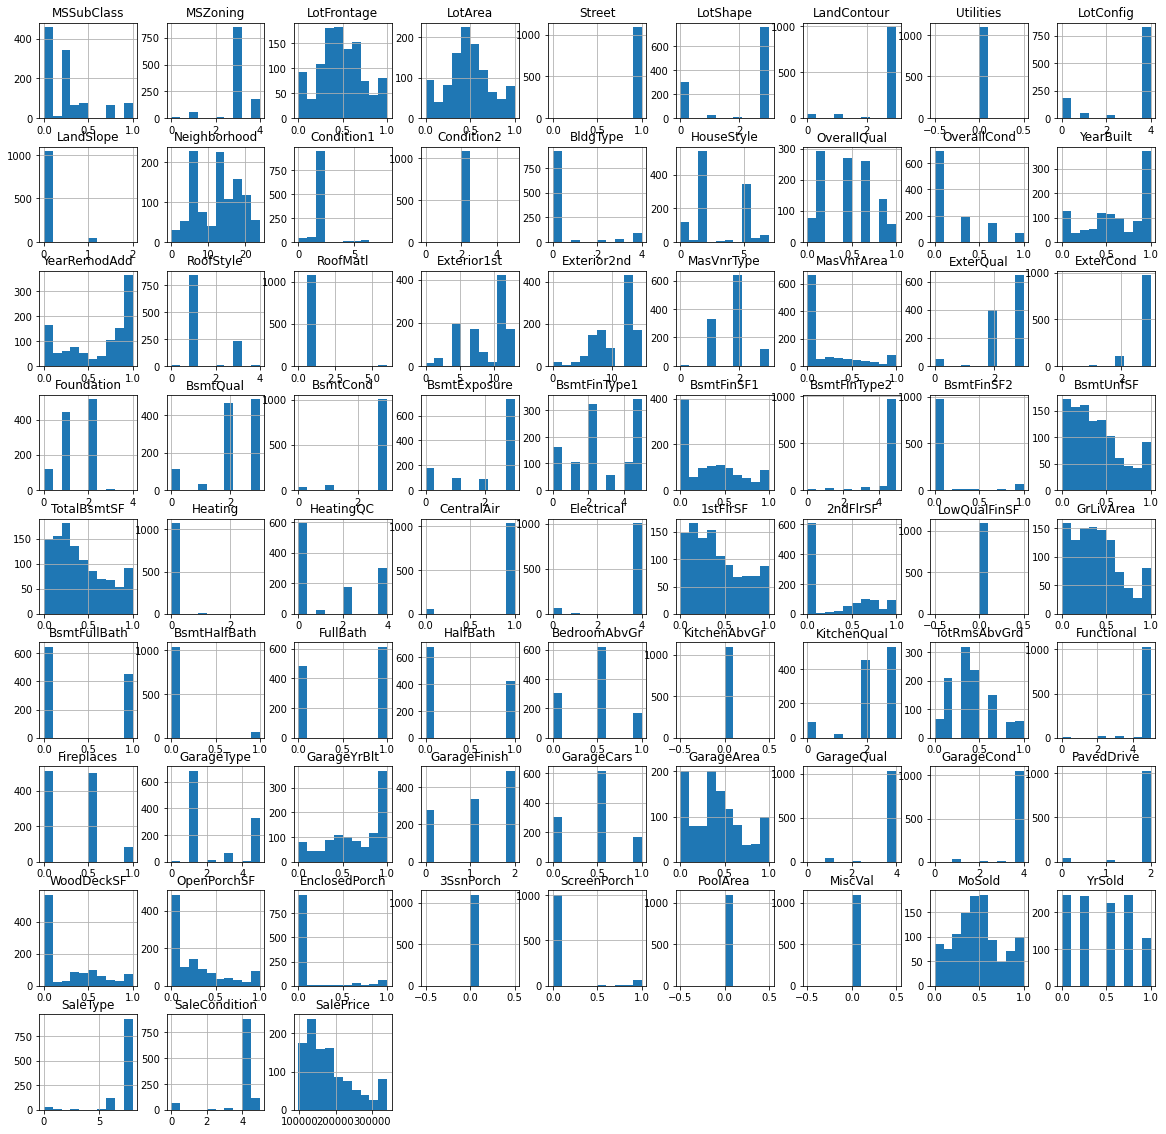

In [91]:
data.hist(figsize=(20,20))

remove unnecesssry columns

remove all columns with one value

In [92]:
v=[]
for i in data.columns:
    if data[i].nunique()==1:
        v.append(i)
data=data.drop(v,axis=1)


In [93]:

target = 'SalePrice'
correlation_matrix = data.corr()
target_correlation = correlation_matrix[target]
threshold = 0.2
selected_features = target_correlation[target_correlation > threshold].index.tolist()
data = data[selected_features]
data[target] = data[target]
data.head()


,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,Foundation,BsmtFinSF1,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice
0,0.418919,0.400365,5,0.6,0.956044,0.913793,1,0.425393,2,0.543077,...,0.5,0.666667,0.0,0.950617,0.5,0.493590,0.000000,0.36234,4,208500.0
1,0.621622,0.488568,24,0.4,0.659341,0.448276,1,0.000000,1,0.752308,...,0.5,0.333333,0.5,0.617284,0.5,0.352564,0.918761,0.00000,4,181500.0
2,0.459459,0.615120,5,0.6,0.934066,0.896552,1,0.351601,2,0.373846,...,0.5,0.333333,0.5,0.925926,0.5,0.589744,0.000000,0.24948,4,223500.0
3,0.351351,0.484733,6,0.6,0.000000,0.344828,1,0.000000,0,0.166154,...,0.5,0.500000,0.5,0.888889,1.0,0.644231,0.000000,0.20790,0,140000.0
4,0.675676,0.845982,15,0.8,0.923077,0.862069,1,0.759631,2,0.503846,...,1.0,0.833333,0.5,0.913580,1.0,0.955128,0.591953,0.49896,4,250000.0


In [94]:
data.shape

(1094, 29)

In [95]:
data.to_csv('cleaned data.csv')

In [96]:
x=data.drop('SalePrice',axis=1)
y=data['SalePrice']

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



applying models


In [98]:

def plot_actual_vs_predicted(y_test, y_test_pred, title):
    # Create a DataFrame for easy plotting
    test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
    
    # Plot
    plt.figure(figsize=(10, 8))
    
    # Scatter Plot
    plt.scatter(test_df.index, test_df['Actual'], color='blue', alpha=0.6, label='Actual Values', marker='o')
    plt.scatter(test_df.index, test_df['Predicted'], color='red', alpha=0.6, label='Predicted Values', marker='x')
    
    plt.title(f'{title} - Actual vs Predicted')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    
    plt.tight_layout()
    plt.show()



Ridge Regression
Test Score: 86.45919438924597
train Score: 85.64872711216415
RMSE: 25887.796285010234
mae 19473.23421363246


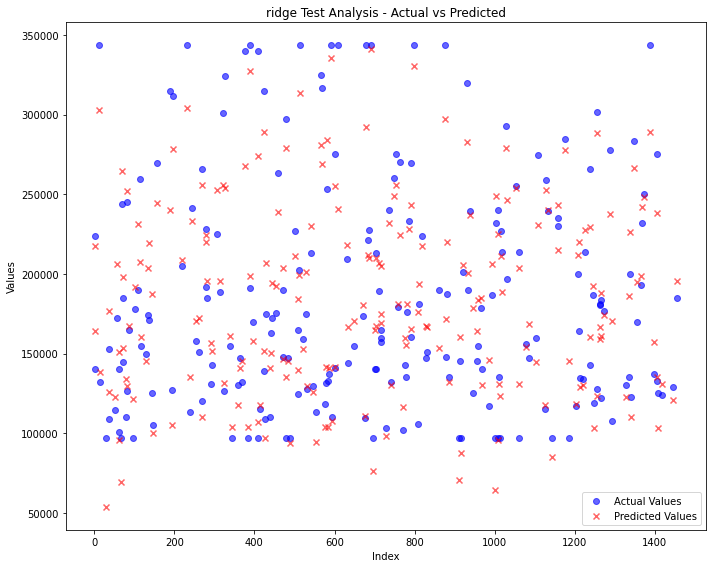

In [99]:
# Ridge Regression
ridge = Ridge(alpha=25)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
print("Ridge Regression")
print("Test Score:", ridge.score(x_test, y_test) * 100)
print("train Score:", ridge.score(x_train, y_train) * 100)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("mae",mean_absolute_error(y_test, y_pred_ridge))
plot_actual_vs_predicted(y_test, y_pred_ridge, 'ridge Test Analysis')


lasso is the best model 

lasso Regression
Test Score: 87.3148330276084
train Score: 87.58418514335565
RMSE: 25056.529884196923
mae 18803.5850631398


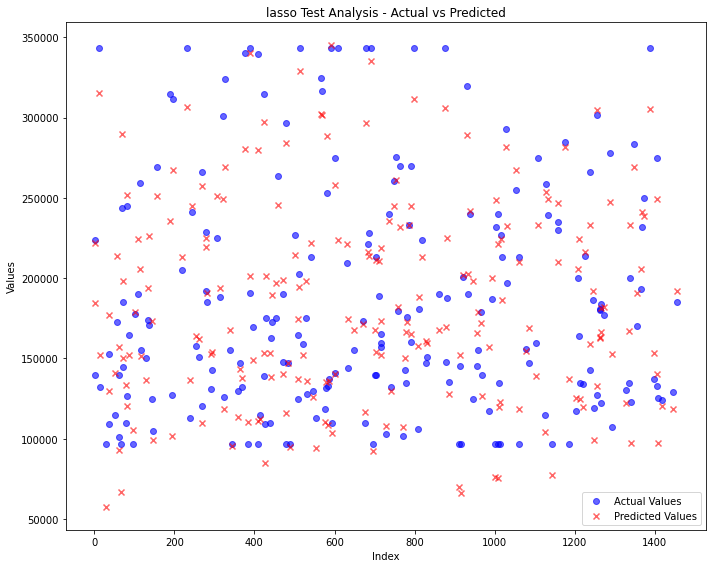

In [100]:

lasso = Lasso(alpha=0.25)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
print("lasso Regression")
print("Test Score:", lasso.score(x_test, y_test) * 100)
print("train Score:", lasso.score(x_train, y_train) * 100)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("mae",mean_absolute_error(y_test, y_pred_lasso))
plot_actual_vs_predicted(y_test, y_pred_lasso, 'lasso Test Analysis')


Linear regression
test score 87.31051301776958
train score 87.58418930670386
rmse 628043501.0112159
mae 18805.7413032865


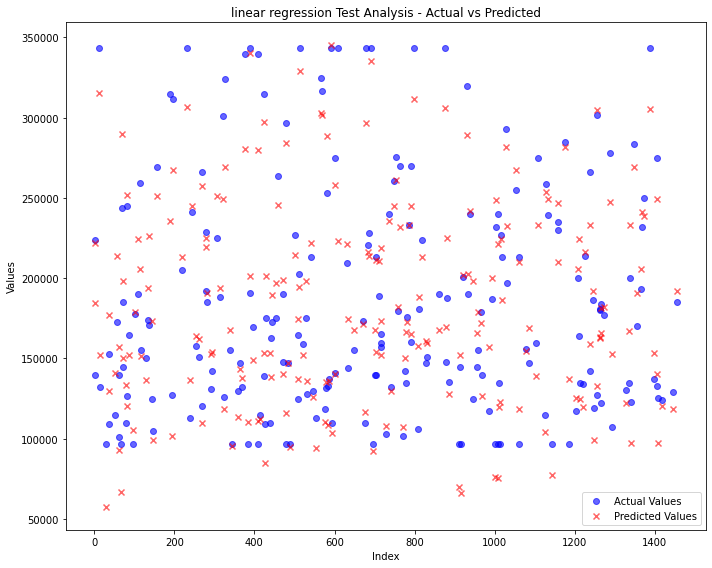

In [101]:
lr=LinearRegression().fit(x_train,y_train)
print('Linear regression')
print("test score",lr.score(x_test,y_test)*100)
print("train score",lr.score(x_train,y_train)*100)
pred=lr.predict(x_test)
rmse = mean_squared_error(y_test, pred)
print("rmse",rmse)
print("mae",mean_absolute_error(y_test, pred))
plot_actual_vs_predicted(y_test, pred, 'linear regression Test Analysis')


In [102]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
scoring = make_scorer(mean_squared_error, greater_is_better=False)
model = RandomForestRegressor(n_estimators=29, random_state=42)

k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform Cross-Validation
scores = cross_val_score(model, x, y, cv=kf, scoring='r2')

# Calculate and Display Results
print(f"Cross-Validation Scores (Negative MSE): {scores}")
print(f"Mean r**2: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Cross-Validation Scores (Negative MSE): [0.88167679 0.88310151 0.90040013 0.84457829 0.89158877]
Mean r**2: 0.8803
Standard Deviation: 0.0191


In [103]:
sweep_config = {
    'method': 'random',  
    'metric': {
        'name': 'R2',  
        'goal': 'maximize'  },
    'parameters': {
        'n_estimators': {
            'values': [50, 100, 150, 200, 250]  },
        'max_depth': {
            'values': [5, 10, 15, 20, 25]  },
        'min_samples_split': {
            'values': [2, 5, 10] },
        'min_samples_leaf': {
            'values': [1, 2, 4]  }
    }
}


In [104]:
import wandb

sweep_id = wandb.sweep(sweep=sweep_config, project='random-forest-regression')


Create sweep with ID: l2lt3ljn
Sweep URL: https://wandb.ai/omar74-000/random-forest-regression/sweeps/l2lt3ljn


In [105]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def train_random_forest():
    # Initialize a new W&B run
    wandb.init()

    # Fetch the sweep parameters
    config = wandb.config

    # Load your data (replace with your actual data)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    # Initialize the model
    model = RandomForestRegressor(
        n_estimators=config.n_estimators,
        max_depth=config.max_depth,
        min_samples_split=config.min_samples_split,
        min_samples_leaf=config.min_samples_leaf
    )

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate the R^2 score
    r2 = r2_score(y_test, predictions)

    # Log the R^2 score to W&B
    wandb.log({'R2': r2})


In [106]:
wandb.agent(sweep_id, function=train_random_forest, count=20)  

wandb: Agent Starting Run: 5rqjelhn with config:
wandb: 	max_depth: 20
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 150
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.90673


wandb: Agent Starting Run: dufwxvnc with config:
wandb: 	max_depth: 15
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.89888


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 725ixb7r with config:
wandb: 	max_depth: 15
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.89505


wandb: Agent Starting Run: 7ckenpml with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 250
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.87124


wandb: Agent Starting Run: rmykoj03 with config:
wandb: 	max_depth: 15
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 250
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.90568


wandb: Agent Starting Run: soft7nno with config:
wandb: 	max_depth: 20
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.86712


wandb: Agent Starting Run: ofb1utt2 with config:
wandb: 	max_depth: 15
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.8835


wandb: Agent Starting Run: ihrcwtls with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.88052


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 97t886od with config:
wandb: 	max_depth: 15
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 250
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.87892


wandb: Agent Starting Run: 15402euo with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 150
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.87822


wandb: Agent Starting Run: ku6vdcbc with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 150
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.91825


wandb: Agent Starting Run: 7d999rhw with config:
wandb: 	max_depth: 20
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.88258


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 5hqrwhcj with config:
wandb: 	max_depth: 15
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.87709


wandb: Agent Starting Run: 9gx24dkm with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.86399


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: zogss4d2 with config:
wandb: 	max_depth: 20
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 150
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.88173


wandb: Agent Starting Run: pbdedcy5 with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.87101


wandb: Agent Starting Run: lgtyhuzu with config:
wandb: 	max_depth: 25
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.88976


wandb: Agent Starting Run: 4zk3l4ze with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.91881


wandb: Agent Starting Run: jpff8onj with config:
wandb: 	max_depth: 20
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 150
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.89449


wandb: Agent Starting Run: nlgvcoe6 with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 150
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


R2,▁
R2,0.88124


Random forest
test score 83.87966664348151
train score 91.0989844362336
rmse 797847116.5046439
mae 20995.306957272056


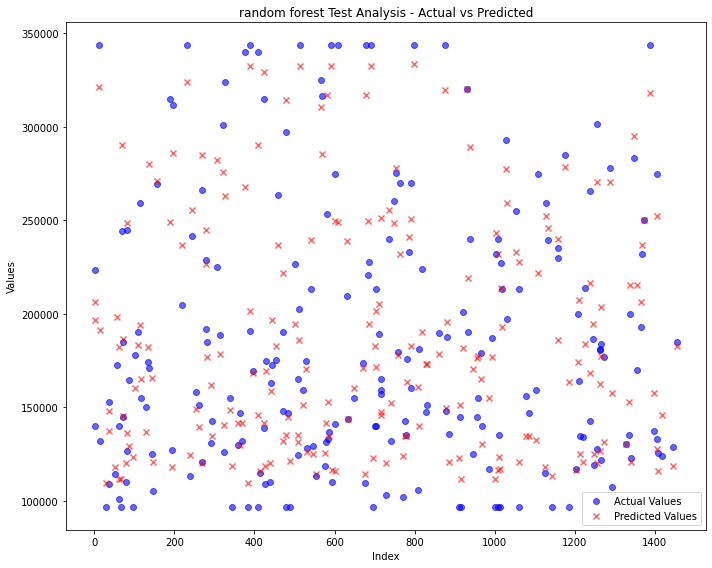

: 

In [107]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=7,max_depth=5,min_samples_leaf=2,min_samples_split=2,warm_start=True).fit(x_train,y_train)#7,5
print('Random forest')
print("test score",rf.score(x_test,y_test)*100)
print("train score",rf.score(x_train,y_train)*100)
pred=rf.predict(x_test)
rmse = mean_squared_error(y_test, pred)
print("rmse",rmse)
print("mae",mean_absolute_error(y_test, pred))

plot_actual_vs_predicted(y_test, pred, 'random forest Test Analysis')


predicted fitting in low values more accuarte from high


| Model               | Test Score (%) | Train Score (%) | RMSE            | MAE            |
|---------------------|----------------|-----------------|-----------------|----------------|
| **Random Forest**    | 80.83          | 84.11          | 795,886,800.14  | 21,314.53      |
| **Linear Regression**| 89.76          | 89.96           | 481,709,690.40  | 16,455.10      |
| **Lasso Regression** | 89.78          | 89.96           | 20,767.46       | 15,718.31      |
| **Ridge Regression** | 89.64          | 88.86           | 22,083.65       | 16,800.44      |
